# 선형회귀분석 1주차 과제

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

## 데이터 준비

In [2]:
num_data = 1000
num_epoch = 500

x1=init.uniform_(torch.Tensor(num_data,1),-5,5)
noise1=init.normal_(torch.FloatTensor(num_data,1),std=2)

x2=init.uniform_(torch.Tensor(num_data,1),-5,5)
noise2=init.normal_(torch.FloatTensor(num_data,1),std=2)

y1=x1**4+x1**2
y2=x2**2+x2

y1_noise=(x1+noise1)**4+(x1+noise1)**2
y2_noise=(x2+noise2)**2+(x2+noise2)

## 선형회귀 모델 준비

In [3]:
model1 = nn.Linear(in_features=1,out_features=1)
model2 = nn.Linear(in_features=1,out_features=1)
                   
loss_func1 = nn.MSELoss() ##L2loss function 을 사용?
loss_func2 = nn.MSELoss()

## 최적화 함수

In [4]:
learning_rate1 = 0.01  ## 최적화가 빨리된다??
learning_rate2 = 0.01

optimizer1 = optim.SGD(model1.parameters(),lr=learning_rate1)
optimizer2 = optim.SGD(model2.parameters(),lr=learning_rate2)

## 학습진행

In [5]:
#y1
label1 = y1_noise
for i in range(num_epoch):
    optimizer1.zero_grad()
    output1 = model1(x1)
    
    loss1=loss_func1(output1,label1)
    loss1.backward()
    optimizer1.step()
    
    if i%10 == 0:
        print(loss1.data.cpu())
    

tensor(833994.3750)
tensor(787713.5000)
tensor(756890.5000)
tensor(736300.0625)
tensor(722543.3125)
tensor(713352.1250)
tensor(707211.5625)
tensor(703108.9375)
tensor(700367.8125)
tensor(698536.5000)
tensor(697312.9375)
tensor(696495.5625)
tensor(695949.4375)
tensor(695584.5625)
tensor(695340.6875)
tensor(695177.8750)
tensor(695068.9375)
tensor(694996.3750)
tensor(694947.6875)
tensor(694915.2500)
tensor(694893.6875)
tensor(694879.2500)
tensor(694869.4375)
tensor(694863.)
tensor(694858.7500)
tensor(694855.8125)
tensor(694853.8750)
tensor(694852.5625)
tensor(694851.7500)
tensor(694851.1250)
tensor(694850.8125)
tensor(694850.5625)
tensor(694850.2500)
tensor(694850.2500)
tensor(694850.1875)
tensor(694850.0625)
tensor(694850.1250)
tensor(694849.9375)
tensor(694850.1250)
tensor(694850.0625)
tensor(694849.9375)
tensor(694850.)
tensor(694850.0625)
tensor(694850.)
tensor(694850.0625)
tensor(694850.)
tensor(694850.0625)
tensor(694850.)
tensor(694849.9375)
tensor(694850.)


In [6]:
#y2
label2 = y2_noise
for i in range(num_epoch):
    optimizer2.zero_grad()
    output2 = model2(x2)
    
    loss2=loss_func2(output2,label2)
    loss2.backward()
    optimizer2.step()
    
    if i%10 == 0:
        print(loss2.data.cpu())

    

tensor(416.7666)
tensor(343.6904)
tensor(305.0560)
tensor(279.4837)
tensor(262.4039)
tensor(250.9925)
tensor(243.3684)
tensor(238.2745)
tensor(234.8711)
tensor(232.5972)
tensor(231.0780)
tensor(230.0629)
tensor(229.3848)
tensor(228.9316)
tensor(228.6289)
tensor(228.4267)
tensor(228.2915)
tensor(228.2012)
tensor(228.1410)
tensor(228.1006)
tensor(228.0737)
tensor(228.0557)
tensor(228.0437)
tensor(228.0357)
tensor(228.0303)
tensor(228.0267)
tensor(228.0243)
tensor(228.0227)
tensor(228.0216)
tensor(228.0209)
tensor(228.0204)
tensor(228.0201)
tensor(228.0199)
tensor(228.0198)
tensor(228.0197)
tensor(228.0197)
tensor(228.0196)
tensor(228.0196)
tensor(228.0195)
tensor(228.0195)
tensor(228.0195)
tensor(228.0195)
tensor(228.0195)
tensor(228.0195)
tensor(228.0195)
tensor(228.0195)
tensor(228.0195)
tensor(228.0195)
tensor(228.0195)
tensor(228.0195)


## 모델검증

In [7]:
num_test_data = 1000
model1=model1.cpu()
model2=model2.cpu()

test_data1=init.uniform_(torch.Tensor(num_test_data, 1),-5,5)
test_data2=init.uniform_(torch.Tensor(num_test_data, 1),-5,5)

## 시각화

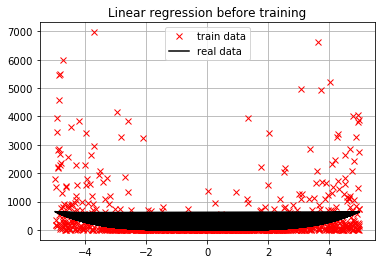

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

x1=x1.cpu()

plt.plot(x1.data, y1_noise.cpu().data, 'rx')
plt.plot(x1.data, y1.data, 'k-')
plt.legend(['train data', 'real data'])
plt.title('Linear regression before training')
plt.grid(True)
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

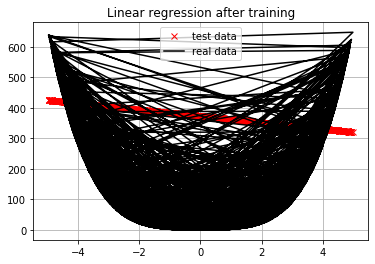

In [9]:
plt.plot(test_data1.data, model1(test_data1).data, 'rx')
plt.plot(test_data1.data, test_data1**4 + test_data1**2, 'k-')
plt.legend(['test data', 'real data'])
plt.title('Linear regression after training')
plt.grid(True)
plt.show

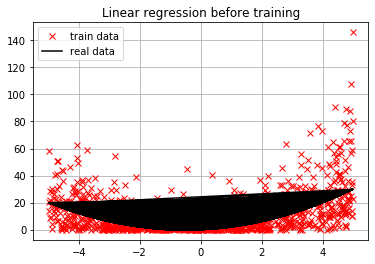

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

x2=x2.cpu()

plt.plot(x2.data, y2_noise.data, 'rx')
plt.plot(x2.data, y2.data, 'k-')
plt.legend(['train data', 'real data'])
plt.title('Linear regression before training')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

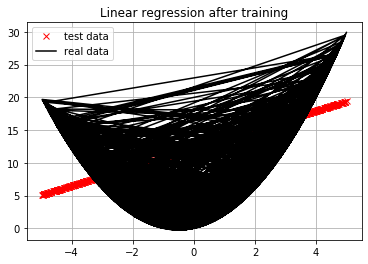

In [11]:
plt.plot(test_data2.data, model2(test_data2).data, 'rx')
plt.plot(test_data2.data, test_data2**2 + test_data2, 'k-')
plt.legend(['test data', 'real data'])
plt.title('Linear regression after training')
plt.grid(True)
plt.show

## 모델 weight 확인하기


In [12]:
model1.weight ## weight가 음수??

Parameter containing:
tensor([[-10.4644]], requires_grad=True)

In [13]:
model2.weight

Parameter containing:
tensor([[1.4324]], requires_grad=True)